# Artificial Neural Networks (ANN) with Keras

An ANN is a network of **neurons** that mimics the human brain.  
It can learn patterns from data.  

Key components:  
- **Input layer**: features of your data  
- **Hidden layers**: neurons with activation functions  
- **Output layer**: predictions  

We will build ANNs using **Keras** (part of TensorFlow)


## Sequential API

The Sequential API is simple: you stack layers **one by one**.  
Good for **plain feed-forward networks**.


In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(4,)),        # use Input layer first
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

## Functional API

Functional API allows **more flexibility**:
- Multiple inputs/outputs  
- Skip connections  
- Complex architectures


In [2]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Input layer
inputs = Input(shape=(4,))

# Hidden layers
x = Dense(8, activation='relu')(inputs)
x = Dense(4, activation='relu')(x)

# Output layer
outputs = Dense(1, activation='sigmoid')(x)

# Model
functional_model = Model(inputs=inputs, outputs=outputs)
functional_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

## Training Pipeline

Steps to train ANN:
1. Prepare dataset  
2. Compile model → define **loss**, **optimizer**, **metrics**  
3. Train model → `model.fit()`  
4. Evaluate → `model.evaluate()`  
5. Use callbacks → early stopping, model checkpoint


In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create dummy dataset
X, y = make_classification(n_samples=500, n_features=4, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5031 - loss: 0.7793 - val_accuracy: 0.5000 - val_loss: 0.7647
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5031 - loss: 0.7066 - val_accuracy: 0.5250 - val_loss: 0.6956
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5312 - loss: 0.6509 - val_accuracy: 0.5875 - val_loss: 0.6451
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6656 - loss: 0.6111 - val_accuracy: 0.6625 - val_loss: 0.6104
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7437 - loss: 0.5850 - val_accuracy: 0.7375 - val_loss: 0.5890
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7906 - loss: 0.5643 - val_accuracy: 0.7500 - val_loss: 0.5706
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8156 - loss: 0.5469 - val_accuracy: 0.8000 - val_loss: 0.5541
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8469 - loss: 0.5306 - val_accuracy: 0.8125 - val_lo

In [4]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8900 - loss: 0.4255 
Test Loss: 0.4255
Test Accuracy: 0.8900


In [5]:
# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

print("First 10 predictions:", y_pred[:10].flatten())
print("First 10 true labels:", y_test[:10])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
First 10 predictions: [1 0 0 0 1 0 0 1 1 0]
First 10 true labels: [1 0 0 0 1 0 0 1 1 0]


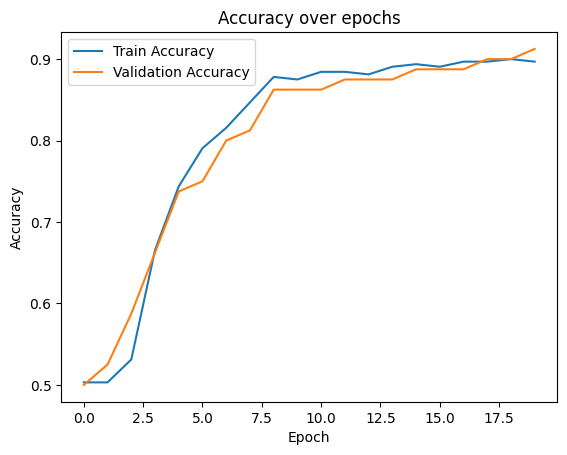

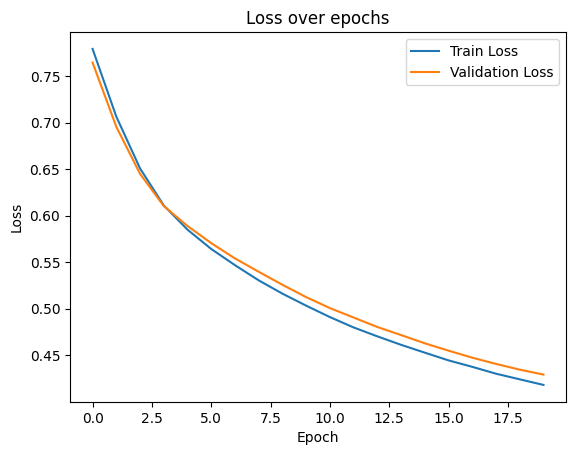

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


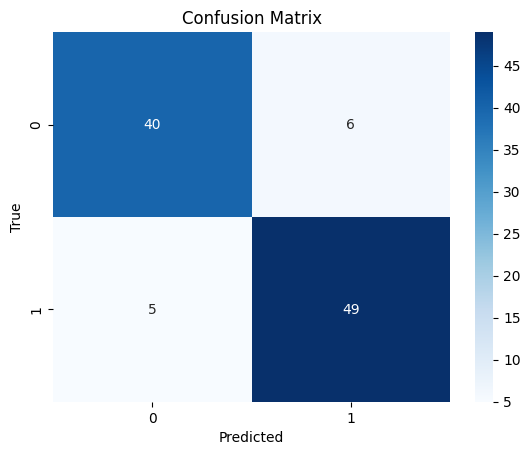

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        46
           1       0.89      0.91      0.90        54

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


# Practice & Experiments

Try these:
1. Change the number of neurons and layers  
2. Use different activation functions: relu, tanh, sigmoid  
3. Change optimizer: adam, sgd, rmsprop  
4. Change batch size and epochs  
